<a href="https://colab.research.google.com/github/rashmi1112/Tensorflow-for-AI-ML-and-DL/blob/main/ComputerVision_Example__FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras


In [2]:
## Load the Fashion MNIST dataset 
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
## Calling load_data() on fmnist object will give us 2 tuples with 2 lists each

(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


LABEL: 6
IMAGE PIXEL ARRAY: [[0.         0.         0.         0.         0.         0.         0.         0.         0.00392157 0.         0.         0.14509804 0.75294118 0.69411765 0.67058824 0.78039216 0.10588235 0.         0.         0.         0.00392157 0.01176471 0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.03529412 0.         0.         0.         0.         0.52941176 0.90196078 0.63529412 0.60784314 0.99215686 0.64313725 0.05490196 0.         0.         0.         0.         0.01176471 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00392157 0.         0.         0.         0.25098039 0.59607843 0.90980392 0.81176471 0.76470588 0.60784314 0.61568627 0.78823529 0.89019608 0.87843137 0.86666667 0.6745098  0.36862745 0.01568627 0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.  

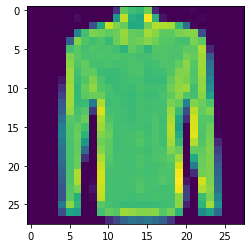

In [19]:
## Taking a look at data elements

import numpy as np
import matplotlib.pyplot as plt

idx = 40

# set the number of characters per row when printing
np.set_printoptions(linewidth = 320)

# print the label and image
print(f'LABEL: {train_labels[idx]}')
print(f'IMAGE PIXEL ARRAY: {train_images[idx]}')

# visualize the image
plt.imshow(train_images[idx])

In [6]:
## Normalize the pixel value of both train and test images

train_images = train_images/ 255.0
test_images = test_images / 255.0

In [20]:
## Building the classification model

model = tf.keras.Sequential(
    [tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 1024, activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)])

In [21]:
## Callback class
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get('accuracy') > 0.91:
      print("stopping the training ,since accuracy reached greater than 91%")
      self.model.stop_training = True

# Instantiating the callback class
cb = myCallback()
## Compile the model

model.compile(optimizer = tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 10, callbacks=cb)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4692 - accuracy: 0.8313
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3565 - accuracy: 0.8701
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3192 - accuracy: 0.8821
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2942 - accuracy: 0.8901
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2777 - accuracy: 0.8967
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2633 - accuracy: 0.9011
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2495 - accuracy: 0.9065
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2374 - accuracy: 0.9107


In [9]:
## Evaluate the model

model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3396 - accuracy: 0.8822


[0.3396320939064026, 0.8822000026702881]

In [15]:
## Exercise 1

classifications = model.predict(test_images)
print(classifications[0])

## This list represents the probabilities of that image belonging to a particular category/class. For example the test_image[0] being a label 0 is 1.33e-05 and the same image being
## of label 9 is 9.34e-01. The highest probability defines the class of the image.

[1.3350062e-05 8.3799918e-09 4.1088310e-07 2.0551304e-12 1.1831108e-07 1.8776776e-02 1.8879561e-08 4.6912249e-02 4.4565672e-06 9.3429261e-01]


9
